# <p align="center">CNN-CT-BRAIN üß†</p>

### 1. Empezamos importando librerias y configurando la semilla

In [54]:
import os as os
import numpy as np
import tensorflow as tf
import random

# Si usaramos GPU forma de saber su nombre
# tf.test.gpu_device_name()

# Declaramos la semilla
seed = 2027

# Semilla aleatoria en NumPy, TensorFlow y Python
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

class_folder_names = os.listdir("archive/files/")
class_folder_names # Clasificacion de los directorios


['aneurysm', 'cancer', 'tumor']

Como podemos ver estos son los nombres de los directorios que disponemos

### 2. Empezamos con la parte carga de datos y de preprocesamiento

In [42]:
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Funci√≥n para cargar y preprocesar im√°genes
def load_and_preprocess_images(base_dir):
    image_paths = []
    classes = []

    # Recorrer cada clase en el directorio base
    for cls in os.listdir(base_dir):
        class_path = os.path.join(base_dir, cls)

        # Verificar si es un directorio
        if os.path.isdir(class_path):
            # Recorrer cada archivo en el directorio de la clase
            for file_name in os.listdir(class_path):
                # Filtrar archivos con extensi√≥n 'jpg'
                if file_name.split('.')[-1] == 'jpg':
                    image_paths.append(os.path.join(class_path, file_name))
                    classes.append(cls)

    # Codificaci√≥n de etiquetas
    le = LabelEncoder()
    y = le.fit_transform(classes)
    y = np.array(y)

    inputs = []

    # Cargar im√°genes y convertirlas a arrays
    for i in tqdm(image_paths):
        image = load_img(i)
        img_array = img_to_array(image)
        inputs.append(img_array)

    X = np.array(inputs)

    return X, y

# Cargar y preprocesar im√°genes
base_dir = "archive/files/"
X, y = load_and_preprocess_images(base_dir)

# Dividir los datos en conjuntos de entrenamiento y prueba
test_size = 0.2
num_classes = len(np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

# Convertir etiquetas a su forma one-hot
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# Preprocesar los datos (escalarlos entre 0 y 1 y convertir las etiquetas a one-hot encoding)
x_train = X_train.astype('float32') 
x_test = X_test.astype('float32') 

# Imprimir dimensiones de los conjuntos de entrenamiento y prueba
print(f"Train data shape: {x_train.shape}, y_train shape: {y_train_one_hot.shape}")
print(f"Test data shape: {x_test.shape}, y_test shape: {y_test_one_hot.shape}")

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 259/259 [00:15<00:00, 16.89it/s]


Train data shape: (207, 512, 512, 3), y_train shape: (207, 3)
Test data shape: (52, 512, 512, 3), y_test shape: (52, 3)


Como podemos observar tenemos 52 im√°genes de prueba con las mismas dimensiones que las de entrenamiento.

### 3. Seguimos con la parte de visualizaccion de los datos

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


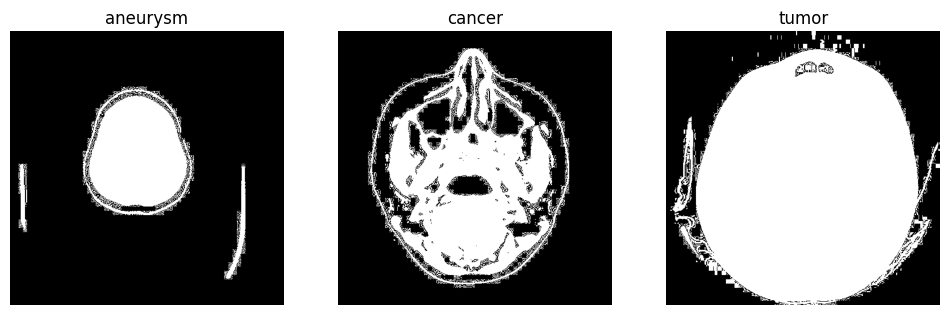

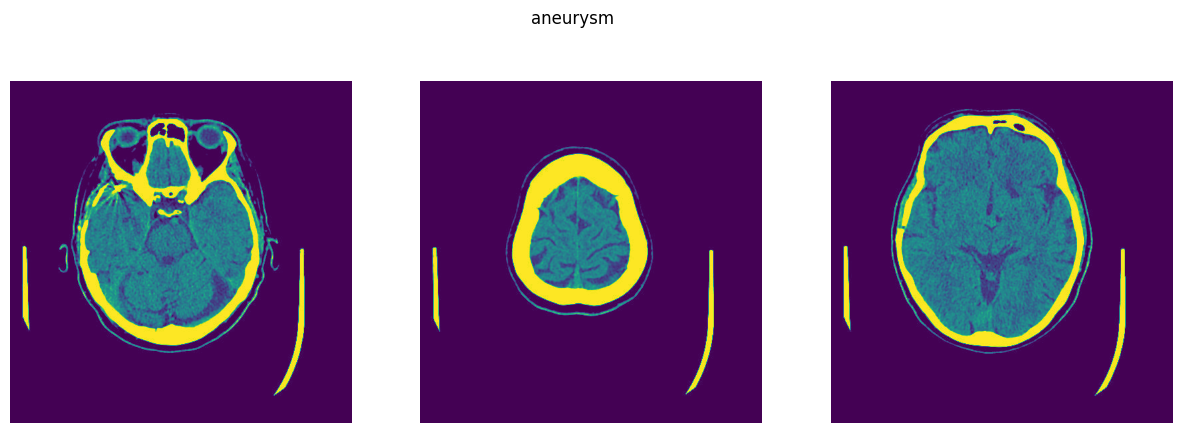

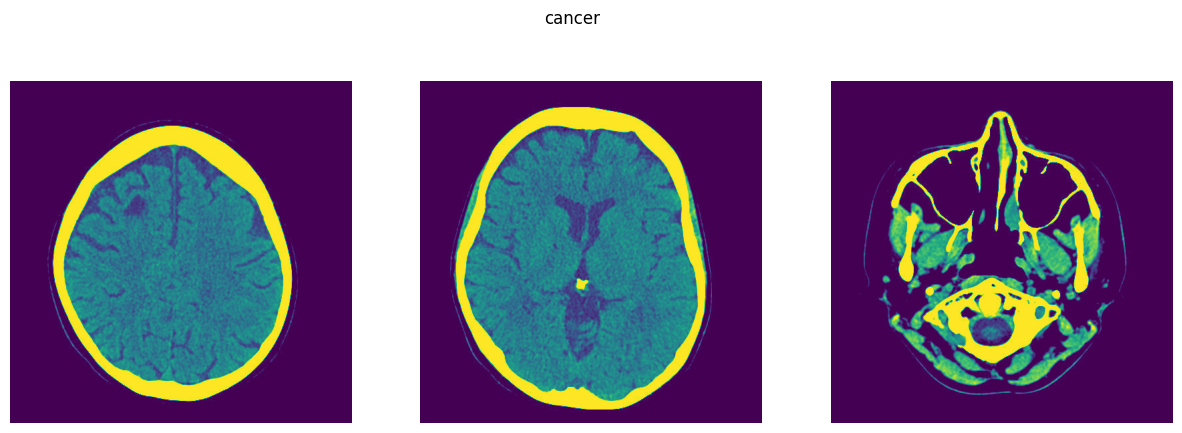

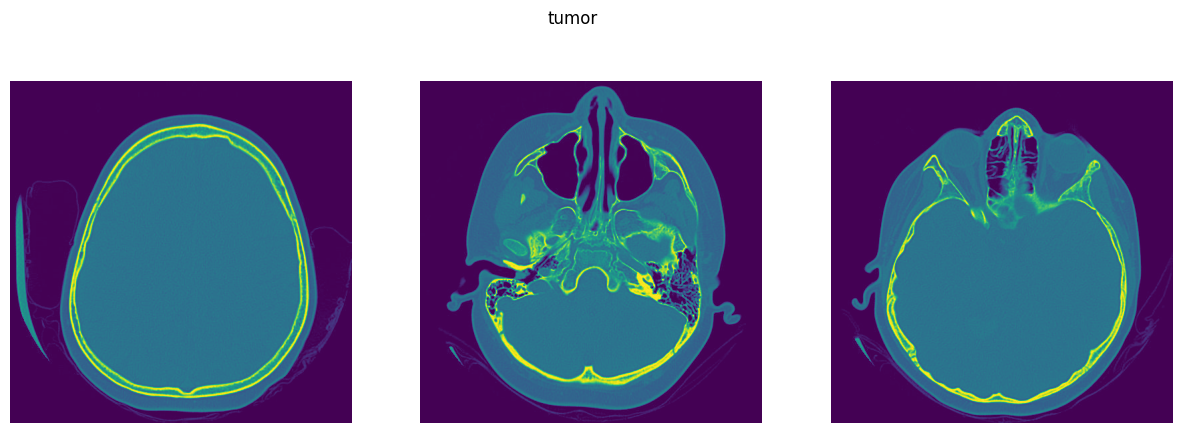

In [49]:
# Visualizacion de los datos
import plotly.express as px
import matplotlib.pyplot as plt
import cv2


unique_classes = np.unique(y_train)
class_indices = {class_id: np.where(y_train == class_id)[0] for class_id in unique_classes}
class_indices


images_count = [len(class_indices[key]) for key in class_indices.keys()]

fig = px.bar(x=class_folder_names, y=images_count, color= class_folder_names)

fig.update_layout(xaxis_title='Disease', yaxis_title='Count', title="Total samples for each class", )
fig.update_traces(texttemplate='%{y}', textposition='inside')

fig.show()

plt.figure(figsize=(12, 5))

for i, (class_id, indices) in enumerate(class_indices.items()):
    random_index = np.random.choice(indices)
    random_image = X_train[random_index] 

    plt.subplot(1, len(unique_classes), i + 1)
    plt.imshow(random_image)
    plt.title(class_folder_names[class_id])
    plt.axis('off')

plt.show()

# Define the base directory
base_dir = "archive/files/"

# Get the class folder names
class_folder_names = os.listdir(base_dir)

# Define the number of images to display for each class
images_to_display = 3

# Loop through each class
for class_id, cls in enumerate(class_folder_names):
    class_path = os.path.join(base_dir, cls)

    # Check if it's a directory
    if os.path.isdir(class_path):
        # Get a list of image files
        image_files = [file for file in os.listdir(class_path) if file.endswith('.jpg')]

        # Randomly select 'images_to_display' number of images
        selected_images = np.random.choice(image_files, images_to_display, replace=False)

        # Display the selected images for this class
        plt.figure(figsize=(15, 5))
        plt.suptitle(cls)

        for i, img_name in enumerate(selected_images):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = img / 255.0  # Normalize to the range [0, 1]

            plt.subplot(1, images_to_display, i + 1)
            plt.imshow(img)  # Use gray colormap
            plt.axis('off')

        plt.show()



Hemos utilizado la libreria plotly para representar la cantidad de muestras de aneurisma, cancer y tumor en formato grafico de barras. Luego vemos unas muestras de las distintas imagenes.

Adicionalmente usamos libreria cv2 para ver las imagenes del cerebro en formato escaner.

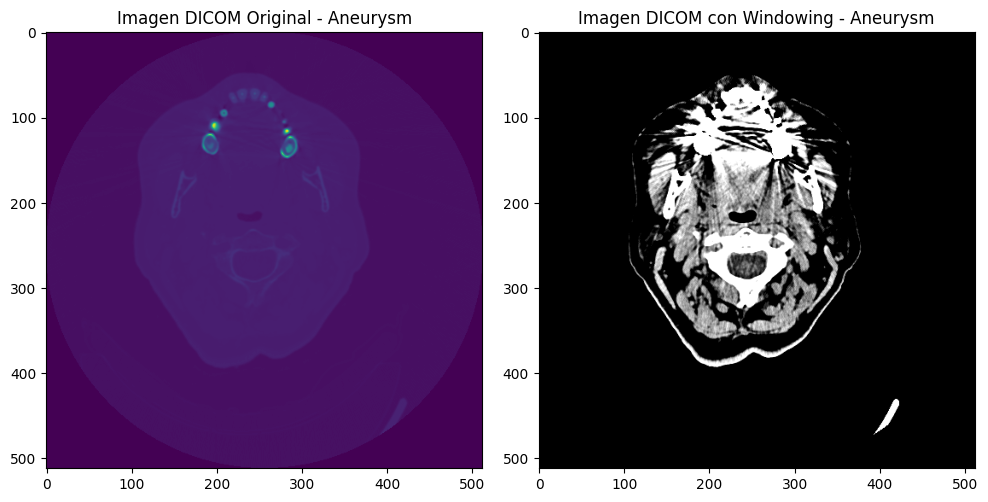

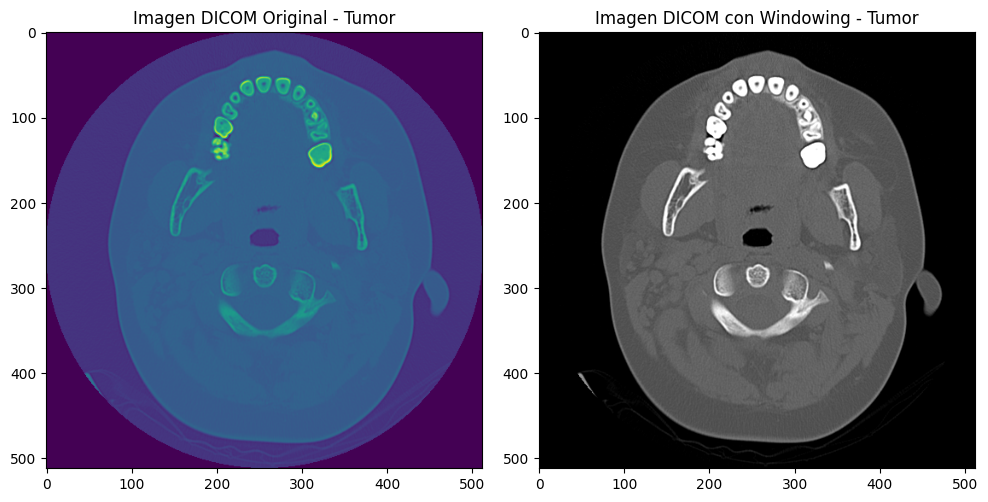

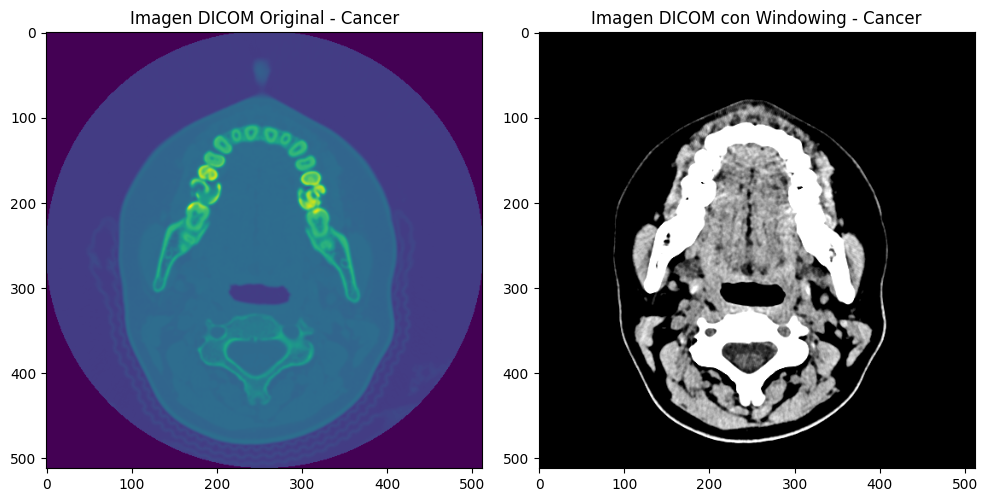

In [43]:
import matplotlib.pyplot as plt
import pydicom as dicom
import os

def load_and_display_images(disease_folder, title):
    # Obtener la lista de archivos en el directorio de la enfermedad
    files = os.listdir(disease_folder)
    
    # Filtrar archivos para obtener im√°genes DICOM
    dcm_files = [file for file in files if file.lower().endswith(".dcm")]

    # Cargar la primera imagen DICOM
    dcm_path = os.path.join(disease_folder, dcm_files[0])
    dcm_dataset = dicom.dcmread(dcm_path)

    # Obtener la imagen y aplicar windowing
    dcm_image = dcm_dataset.pixel_array
    window_center = dcm_dataset.WindowCenter if hasattr(dcm_dataset, 'WindowCenter') else dcm_image.mean()
    window_width = dcm_dataset.WindowWidth if hasattr(dcm_dataset, 'WindowWidth') else dcm_image.max() - dcm_image.min()
    img_min = window_center - window_width / 2
    img_max = window_center + window_width / 2
    dcm_image = np.clip(dcm_image, img_min, img_max)

    # Crear subgr√°ficos
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Mostrar la imagen original en el primer subgr√°fico
    axs[0].imshow(dcm_dataset.pixel_array)
    axs[0].set_title(f'Imagen DICOM Original - {title}')

    # Mostrar la imagen con windowing en el segundo subgr√°fico
    axs[1].imshow(dcm_image, cmap='gray')
    axs[1].set_title(f'Imagen DICOM con Windowing - {title}')

    # Ajustar el dise√±o y mostrar la figura
    plt.tight_layout()
    plt.show()

# Directorios para cada enfermedad
aneurysm_folder = "archive/files/aneurysm"
tumor_folder = "archive/files/tumor"
cancer_folder = "archive/files/cancer"

# Visualizar im√°genes para cada enfermedad
load_and_display_images(aneurysm_folder, "Aneurysm")
load_and_display_images(tumor_folder, "Tumor")
load_and_display_images(cancer_folder, "Cancer")

Se ha utilizado la ibreria pydicom que se utuliza para visualizar im√°genes de cerebro en formato DICOM.

El "windowing", es una t√©cnica utilizada para ajustar la apariencia visual de las im√°genes radiol√≥gicas.

Permite resaltar o mejorar la visibilidad de ciertas estructuras anat√≥micas o patol√≥gicas al ajustar la presentaci√≥n de niveles de gris en la imagen.

### 4. Creamos el modelo de entrenamiento <span style="color:red">Falta modificar</span>


Found 259 files belonging to 3 classes.

Original Images:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Augmented Images:
Normalized Images:


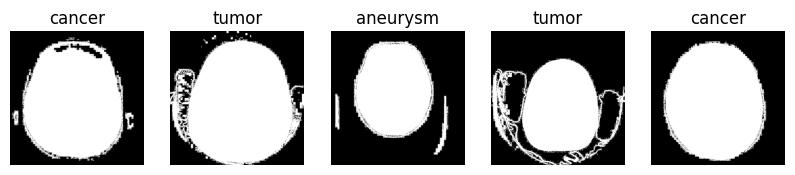

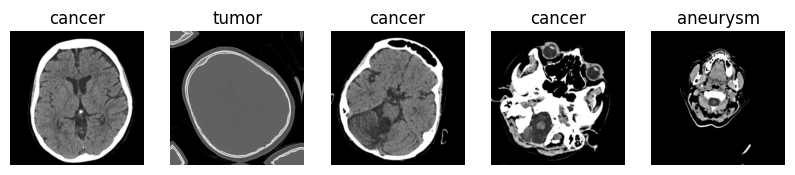

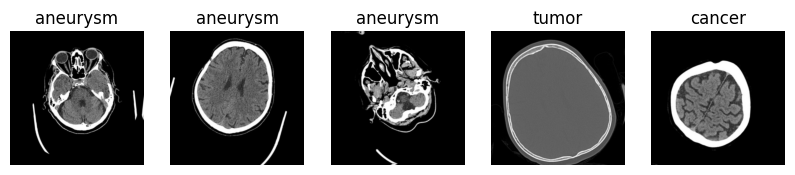

In [55]:
#####################
# CREACION DEL MODELO
#####################

# Constantes
IMAGE_SIZE = 516
BATCH_SIZE = 32

# Cargamos un batch del dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "archive/files",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Obtenemos los nombres de las clases
class_names = dataset.class_names

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

# Aplicamos el data augmentation rescalando la imagen
augmented_dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
augmented_dataset = augmented_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Normalizmaos las imagenes y realizmaos el reescalado
normalized_dataset = augmented_dataset.map(lambda x, y: (x, y))
normalized_dataset = normalized_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Funcion para mostrar las imagenes del dataset
def show_images(dataset, num_batches=1, num_images=5):
    plt.figure(figsize=(10 * num_batches, 10 * num_images))
    for batch_num, (images, labels) in enumerate(dataset.take(num_batches)):
        for i in range(num_images):
            ax = plt.subplot(num_batches, num_images, batch_num * num_images + i + 1)
            plt.imshow(images[i].numpy().astype("float32"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

# Mostramos las imagenes original
print("Original Images:")
show_images(dataset)

# Mostrar las imagenes aumentadas
print("Augmented Images:")
show_images(augmented_dataset)

# Mostrar las imagenes normalizadas
print("Normalized Images:")
show_images(normalized_dataset)

plt.show()

Se utiliza prefetch para mejorar el rendimiento del conjunto de datos, permitiendo que las im√°genes se carguen en paralelo mientras se entrena el modelo.

In [57]:
# Copia las clases obtenidas del conjunto de datos
class_names = class_names

def split_train_test_val(ds, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=False):
    # Obt√©n el tama√±o total del conjunto de datos
    ds_size = len(ds)

    # Calcula el tama√±o de los conjuntos de entrenamiento, prueba y validaci√≥n
    train_size = round(train_split * ds_size)
    test_size = round(test_split * ds_size)
    val_size = round(val_split * ds_size)

    # Si se solicita, baraja el conjunto de datos
    if shuffle:
        ds = ds.shuffle()

    # Divide el conjunto de datos en conjuntos de entrenamiento, prueba y validaci√≥n
    train_ds = ds.take(train_size)    
    test_ds = ds.skip(train_size).take(test_size)
    val_ds = ds.skip(train_size).skip(test_size)

    return train_ds, test_ds, val_ds

# Llama a la funci√≥n para obtener los conjuntos de entrenamiento, prueba y validaci√≥n
train_ds, test_ds, val_ds = split_train_test_val(ds=dataset)


In [58]:
tarin_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
class_names = dataset.class_names


from tensorflow.keras import models,layers

image_preprocessing = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE,
    interpolation='bilinear',
    crop_to_aspect_ratio=False),
    layers.Rescaling(1./255),
     layers.RandomFlip("horizontal_and_vertical"),
     layers.RandomRotation(0.2),
])

BATCH = 32
CHANNELS = 3

input_size = (BATCH,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model = models.Sequential([
    image_preprocessing,
    layers.Conv2D(32,(8,8),activation='relu',input_shape=input_size),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'),
    layers.Conv2D(64,kernel_size=(4,4),activation='relu'),
    layers.Dropout(.2),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names),activation='softmax')
])

model.build(input_shape=input_size)

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 516, 516, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 509, 509, 32)        6176      
                                                                 
 max_pooling2d (MaxPooling2  (32, 254, 254, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 251, 251, 64)        32832     
                                                                 
 dropout (Dropout)           (32, 251, 251, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (32, 249, 249, 64)        36928     
                                                     

In [62]:
# Aplicar un modelo o varios y entrenarlos para ver quien se comporta mejor
# a nuestra clasificacion de enfermedad cerebral 

<span style="color:red">Dentro del apartado del entrenamiento de modelo falta entrenarlo, y modificar para plantear cualquier tipo de modelo (el que mejor se ajuste o mostrar varios, etc.)</span>


### 5. Metrica <span style="color:red"> PENDIENTE</span>


In [60]:
# Mostrar las graficas y matriz de confusion


### 6. Probando el modelo <span style="color:red"> PENDIENTE</span>

In [61]:
# Probar que el modelo es capaz de predecir las imagenes

### 7. Guardamos el modelo generado

In [59]:
model.save("model_cnn_ct_brain.keras")